In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [2]:
from optimization_target import target_func, FUNC_DOMAIN, FUNC_RANGE

TUNABLE_PARAM_NAME = "sched_migration_cost_ns"
METRIC_NAME = "Latency, ms"

print(f"x: '{TUNABLE_PARAM_NAME}' :: target_func domain = {FUNC_DOMAIN}")
print(f"y: '{METRIC_NAME}' :: target_func range = {FUNC_RANGE}")

x: 'sched_migration_cost_ns' :: target_func domain = (0, 1000000)
y: 'Latency, ms' :: target_func range = (0.2, 1.8)


In [3]:
NUM_SAMPLES = 11

In [4]:
df_grid = pandas.DataFrame({"x": np.linspace(*FUNC_DOMAIN, NUM_SAMPLES)})
df_grid["y"] = df_grid.x.apply(target_func)
df_grid

,x,y
0,0.0,0.61250
1,100000.0,0.60162
2,200000.0,0.60002
3,300000.0,0.60002
4,400000.0,0.60162
5,500000.0,0.61250
6,600000.0,0.64802
7,700000.0,0.73122
8,800000.0,0.89282
9,900000.0,1.17122


In [5]:
np.random.seed(45)
df_rand = pandas.DataFrame({"x": np.random.uniform(*FUNC_DOMAIN, NUM_SAMPLES)})
df_rand["y"] = df_rand.x.apply(target_func)
# df_rand.head(5)

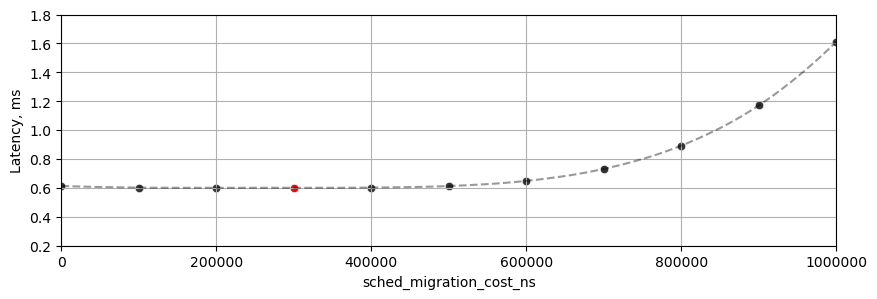

In [6]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df_grid, x="x", y="y", marker='o', color="black", alpha=0.8)
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = df_grid.x.to_numpy()
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.4, linestyle='--')

plt.xlim(*FUNC_DOMAIN)
plt.ylim(*FUNC_RANGE)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.show()

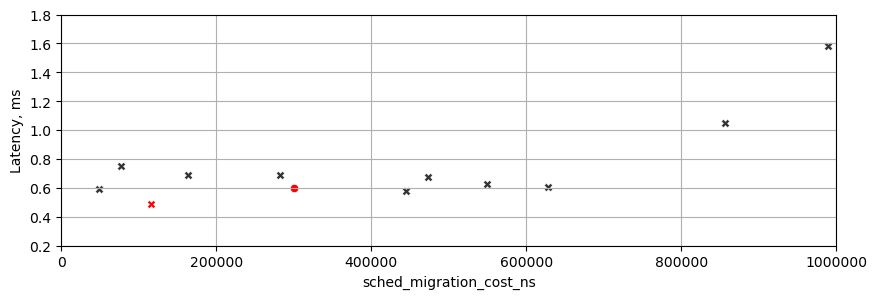

In [7]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.8)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

# Best point from grid search
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = df_rand.x.to_numpy()
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

# sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.4, linestyle='--')

plt.xlim(*FUNC_DOMAIN)
plt.ylim(*FUNC_RANGE)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.show()

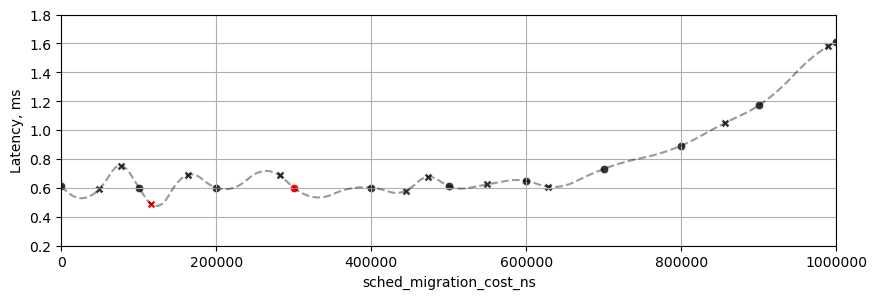

In [8]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df_grid, x="x", y="y", marker='o', color="black", alpha=0.8)
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.8)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

x = np.concatenate([df_grid.x, df_rand.x])
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.4, linestyle='--')

plt.xlim(*FUNC_DOMAIN)
plt.ylim(*FUNC_RANGE)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.show()